In [23]:
############## le clear('all') de Matlab
for name in dir():
    if not name.startswith('_'):
        del globals()[name]
################################"

import math
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

from scipy import ndimage
from scipy import signal

from skimage import io

from skimage import filters

##############################################

import mrlab as mr

##############################################"

############## le close('all') de Matlab
plt.close('all')

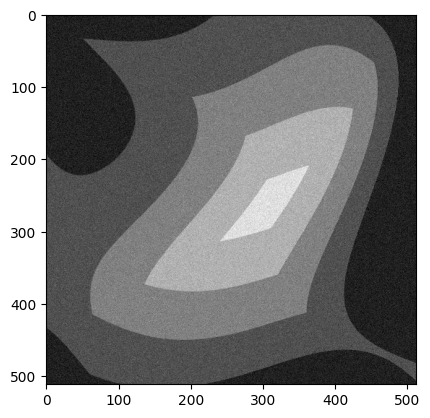

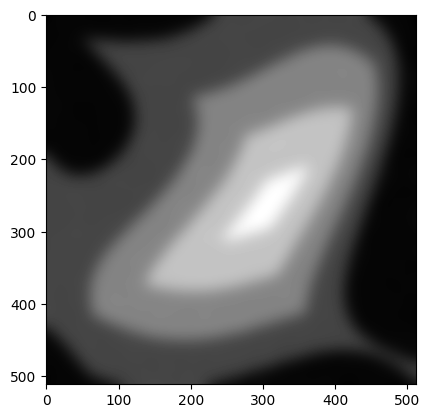

In [35]:
ima=io.imread('images/pyra-gauss.tif')
alpha=0.5
sigma=10


plt.figure('Image originale')
plt.imshow(ima, cmap='gray')

ima=filters.gaussian(ima,sigma)


plt.figure('Image filtrée (passe-bas)')
plt.imshow(ima, cmap='gray')

gradx=mr.dericheGradX(mr.dericheSmoothY(ima,alpha),alpha)
grady=mr.dericheGradY(mr.dericheSmoothX(ima,alpha),alpha)  

gradx2=mr.dericheGradX(mr.dericheSmoothY(gradx,alpha),alpha)
grady2=mr.dericheGradY(mr.dericheSmoothX(grady,alpha),alpha)  

  



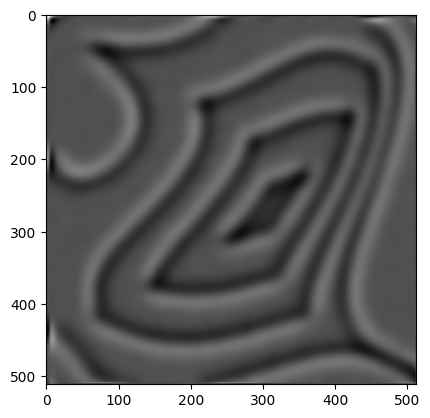

In [36]:
lpima=gradx2+grady2

plt.figure('Laplacien')
plt.imshow(lpima, cmap='gray')

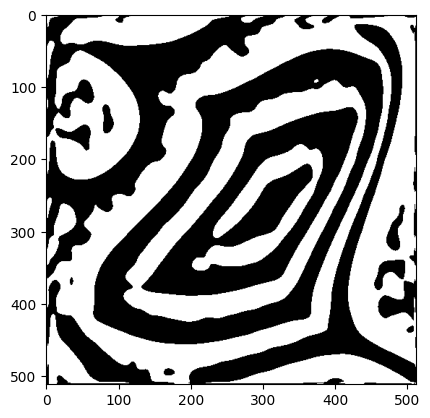

In [37]:
posneg=(lpima>=0)

plt.figure('Laplacien binarisé -/+')
plt.imshow(255*posneg, cmap='gray')

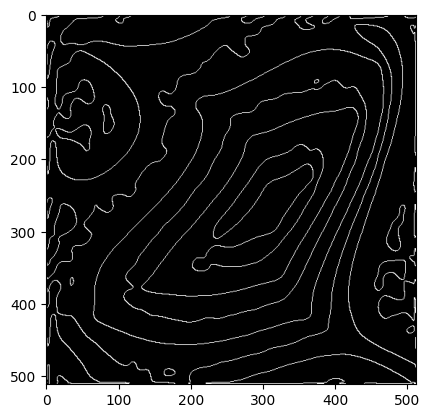

In [38]:

nl,nc=ima.shape
contours=np.uint8(np.zeros((nl,nc)))


for i in range(1,nl):
    for j in range(1,nc):
        if (((i>0) and (posneg[i-1,j] != posneg[i,j])) or
            ((j>0) and (posneg[i,j-1] != posneg[i,j]))):
            contours[i,j]=255
            
   
plt.figure('Contours')
plt.imshow(contours, cmap='gray')